# Unify the results 

In [2]:
import json

# Charger les fichiers JSON
filenames = ["rewards/reward_1.json", "rewards/reward_2.json", "rewards/reward_3.json",
            "rewards/reward_4.json","rewards/reward_5.json","rewards/reward_6.json",
            "rewards/reward_7.json", "rewards/reward_8.json"]
all_rewards = []
offset = 0

for filename in filenames:
    with open(filename, "r") as f:
        rewards = json.load(f)
    
    # Re-numéroter les épisodes et les ajouter à la liste finale
    renumbered_rewards = {int(ep) + offset: rew for ep, rew in rewards.items()}
    all_rewards.append(renumbered_rewards)
    
    # Mettre à jour l'offset
    offset = max(renumbered_rewards.keys()) + 10_000

# Fusionner les dictionnaires
final_rewards = {k: v for d in all_rewards for k, v in d.items()}

# Sauvegarder dans un nouveau fichier
with open("rewards/merged_rewards.json", "w") as f:
    json.dump(final_rewards, f, indent=4)



# Plot the best model

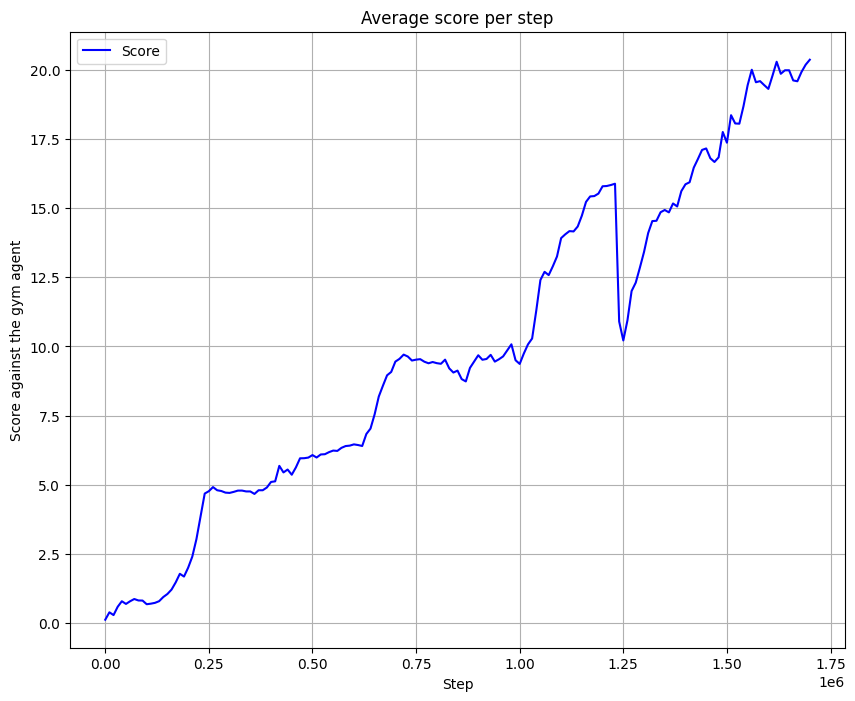

In [3]:
import json
import matplotlib.pyplot as plt

# Charger le JSON fusionné
with open("rewards/merged_rewards.json", "r") as f:
    rewards = json.load(f)

# Ajouter 21 à chaque reward
updated_rewards = {int(k): v + 21 for k, v in rewards.items()}

# Sauvegarder le JSON mis à jour
with open("rewards/updated_rewards.json", "w") as f:
    json.dump(updated_rewards, f, indent=4)

# Trier les épisodes
steps = sorted(updated_rewards.keys())
avg_rewards = [updated_rewards[step] for step in steps]

# Tracer la courbe
plt.figure(figsize=(10, 8))
plt.plot(steps, avg_rewards, label="Score", color="b")
plt.xlabel("Step")
plt.ylabel("Score against the gym agent")
plt.title("Average score per step")
plt.legend()
plt.grid()
plt.show()
